<a href="https://colab.research.google.com/github/minhthong-2077/22-Learn-How-to-Build-a-Linear-Regression-Model-in-Pytorch/blob/main/VHU_HOCMAY_SON_QUY_SY_LOC_HUNG_THONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit_learn
!pip install seaborn
!pip install torch
!pip install torchvision

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive vào Colab

import sys
import os

# Thêm đường dẫn đến Google Drive vào sys.path
sys.path.append('/content/drive')

# Thay đổi thư mục làm việc hiện tại
os.chdir('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

'Bản sao của Colaboratory chào mừng bạn!'   Untitled0.ipynb   Untitled5.ipynb
'BT2-Dương Thi Sỹ.ipynb'		    Untitled1.ipynb   Untitled6.ipynb
 data.csv				    Untitled2.ipynb   Untitled7.ipynb
'DƯƠNG  THI SỸ-BT1'			    Untitled3.ipynb
 Linear_Regression.ipynb		    Untitled4.ipynb


In [ ]:
#reading data
df = pd.read_csv("data.csv")

In [ ]:
df.tail(8)  # Visualizing some of the rows of our data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1993,2015,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,NaN
1994,2015,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,NaN
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [ ]:
df = df.drop(["year", "customer_id", "phone_no"], axis=1) # removing the unwanted features

In [ ]:
print(df.shape)         # Lookiing the shape of the data

(2000, 13)


In [ ]:
print(df.columns)       # Looking how many columns data has

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')


In [ ]:
df.dtypes               # Looing the type of data each column consists of

,0
gender,object
age,int64
no_of_days_subscribed,int64
multi_screen,object
mail_subscribed,object
weekly_mins_watched,float64
minimum_daily_mins,float64
maximum_daily_mins,float64
weekly_max_night_mins,int64
videos_watched,int64


In [ ]:
#checking null values in data
df.isnull().sum()

,0
gender,24
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0
maximum_daily_mins,0
weekly_max_night_mins,0
videos_watched,0


In [ ]:
df1 = df.dropna()         # Dropping the null values
df1.head(5)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
df1.isnull().sum()        #Looking the total null values again just in case

,0
gender,0
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0
maximum_daily_mins,0
weekly_max_night_mins,0
videos_watched,0


In [ ]:
df1.shape #shape of the data

(1918, 13)

In [ ]:
df1[['gender', 'multi_screen', 'mail_subscribed']]

,gender,multi_screen,mail_subscribed
0,Female,no,no
1,Female,no,no
2,Female,no,no
3,Female,no,yes
4,Female,no,no
...,...,...,...
1990,Male,no,no
1991,Male,yes,yes
1992,Female,no,yes
1996,Male,no,no


In [ ]:
#label encoding categorical features
label_encoder = preprocessing.LabelEncoder()
df1['gender']= label_encoder.fit_transform(df1['gender'])
df1['multi_screen']= label_encoder.fit_transform(df1['multi_screen'])
df1['mail_subscribed']= label_encoder.fit_transform(df1['mail_subscribed'])

In [ ]:
df1.head(4)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0


In [ ]:
x = df1.drop("no_of_days_subscribed", axis=1)
X = pd.DataFrame(x)

In [ ]:
X

,gender,age,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0,40,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1,32,0,0,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,1,49,1,1,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,0,42,0,1,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,1,45,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0


In [ ]:
X.tail(4)

,gender,age,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1991,1,49,1,1,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,0,42,0,1,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,1,45,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1999,1,37,0,0,326.70,10.3,37.03,89,6,3.0,1,1.0


In [ ]:
#scaling data
sc = MinMaxScaler()
X = sc.fit_transform(X)
X = sc.transform(X)

In [ ]:
X

array([[ 0., 36.,  0., ...,  4.,  1.,  0.],
       [ 0., 39.,  0., ...,  3.,  2.,  0.],
       [ 0., 65.,  0., ...,  4.,  5.,  1.],
       ...,
       [ 0., 42.,  0., ...,  3.,  3.,  0.],
       [ 1., 45.,  0., ...,  3.,  1.,  0.],
       [ 1., 37.,  0., ...,  3.,  1.,  1.]])

In [ ]:
X.shape

(1918, 12)

In [ ]:
n_samples, n_features = X.shape   # Storing the values in two parts as it will easy later to feed the model

In [ ]:
Y = df1["no_of_days_subscribed"]         # no_of_days_subscribed
Y.tail(10)

,no_of_days_subscribed
1985,73
1986,42
1987,157
1988,133
1989,144
1990,61
1991,50
1992,119
1996,127
1999,73


<Axes: xlabel='no_of_days_subscribed', ylabel='Density'>

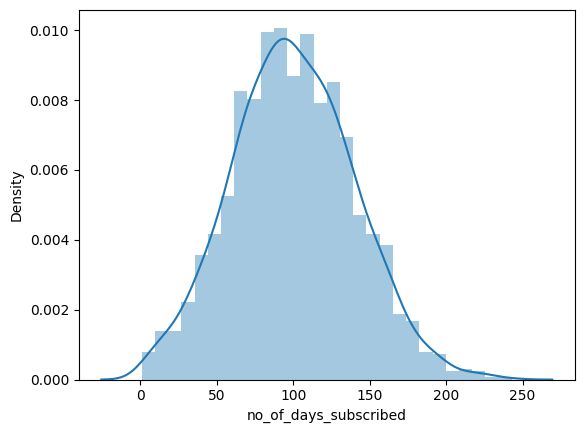

In [ ]:
sns.distplot(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train.values))
print(type(y_test.values))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# X_train = pd.DataFrame.to_numpy(X_train)
# X_test = pd.DataFrame.to_numpy(X_test)
# y_train = pd.DataFrame.to_numpy(y_train.values)
# y_test = pd.DataFrame.to_numpy(y_test.values)

# print(type(y_test))
# print(type(y_train))
# print(type(X_test))
# print(type(X_test))

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

In [ ]:
X_train.dtype
X_test.dtype

dtype('float32')

In [ ]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
in_dimn = n_features     # its 12 our case
out_dimn = 1             # in our case 1

In [ ]:
# Creating the model in PyTorch

class LinearRegressionModel(torch.nn.Module):
    def __init__(self,in_dimn,out_dimn):
        super(LinearRegressionModel,self).__init__()
        self.model=torch.nn.Linear(in_dimn,out_dimn)
    def forward(self,x):
        y_pred=self.model(x);
        return y_pred

model=LinearRegressionModel(in_dimn, out_dimn) #Instantiating the model

In [ ]:
model.parameters

In [ ]:
num_epochs = 1000
# Traning the model for large number of epochs to see better results
learning_rate = 0.01
criterion = nn.MSELoss()
# It's Linear Regression so use Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Using SGD optimizer to find local minima

In [ ]:
X_train

array([[ 0., 35.,  0., ...,  4.,  1.,  0.],
       [ 0., 38.,  0., ...,  4.,  1.,  0.],
       [ 0., 42.,  0., ...,  2.,  1.,  0.],
       ...,
       [ 0., 39.,  0., ...,  3.,  2.,  0.],
       [ 1., 50.,  0., ...,  4.,  0.,  0.],
       [ 1., 56.,  1., ...,  3.,  1.,  1.]], dtype=float32)

In [ ]:
for epoch in range(num_epochs):
    # Chuyển đổi X_train thành Tensor PyTorch
    X_train_tensor = torch.from_numpy(X_train)

    y_pred = model(X_train_tensor)  # Sử dụng Tensor đã chuyển đổi
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()     # Xóa gradient
    if (epoch+1) % 30 == 0:
        # In giá trị loss sau mỗi 30 epochs
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 30, loss = 1789.5431
epoch: 60, loss = 1726.1561
epoch: 90, loss = 1718.7347
epoch: 120, loss = 1712.7562
epoch: 150, loss = 1708.2634
epoch: 180, loss = 1704.8397
epoch: 210, loss = 1702.2100
epoch: 240, loss = 1700.1685
epoch: 270, loss = 1698.5624
epoch: 300, loss = 1697.2747
epoch: 330, loss = 1696.2151
epoch: 360, loss = 1695.3160
epoch: 390, loss = 1694.5278
epoch: 420, loss = 1693.8153
epoch: 450, loss = 1693.1537
epoch: 480, loss = 1692.5261
epoch: 510, loss = 1691.9204
epoch: 540, loss = 1691.3292
epoch: 570, loss = 1690.7468
epoch: 600, loss = 1690.1700
epoch: 630, loss = 1689.5963
epoch: 660, loss = 1689.0242
epoch: 690, loss = 1688.4528
epoch: 720, loss = 1687.8809
epoch: 750, loss = 1687.3086
epoch: 780, loss = 1686.7354
epoch: 810, loss = 1686.1615
epoch: 840, loss = 1685.5862
epoch: 870, loss = 1685.0101
epoch: 900, loss = 1684.4332
epoch: 930, loss = 1683.8553
epoch: 960, loss = 1683.2767
epoch: 990, loss = 1682.6975


In [ ]:
# Tách đầu ra khỏi đồ thị tính toán và chuyển đổi sang numpy
y_pred = model(torch.from_numpy(X_test)).detach().numpy()
# Chuyển đổi X_test thành Tensor PyTorch trước khi đưa vào mô hình

In [ ]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, y_pred)

-0.09475839138031006

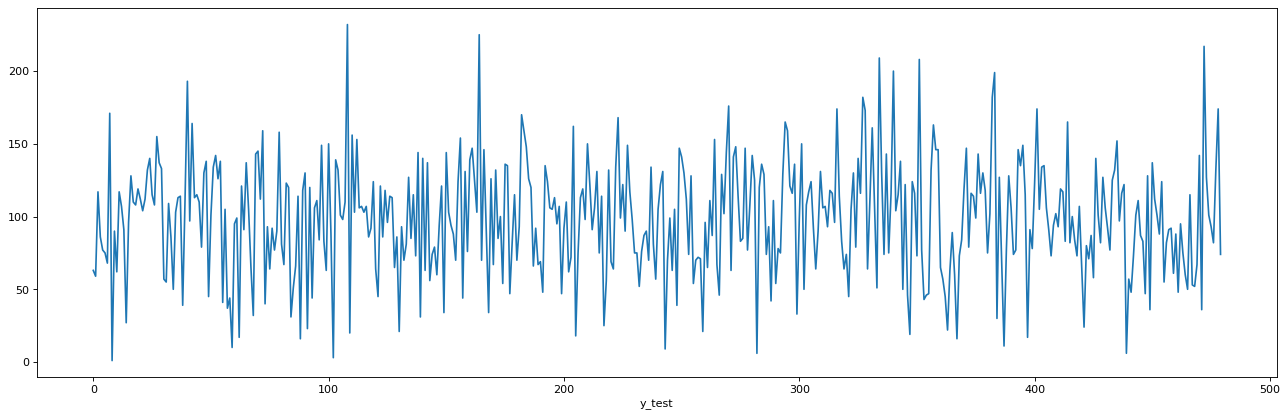

In [ ]:
# plt.scatter(y_test,y_pred, color="red")

from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
plt.plot(y_test)
plt.xlabel("y_test")


plt.show()

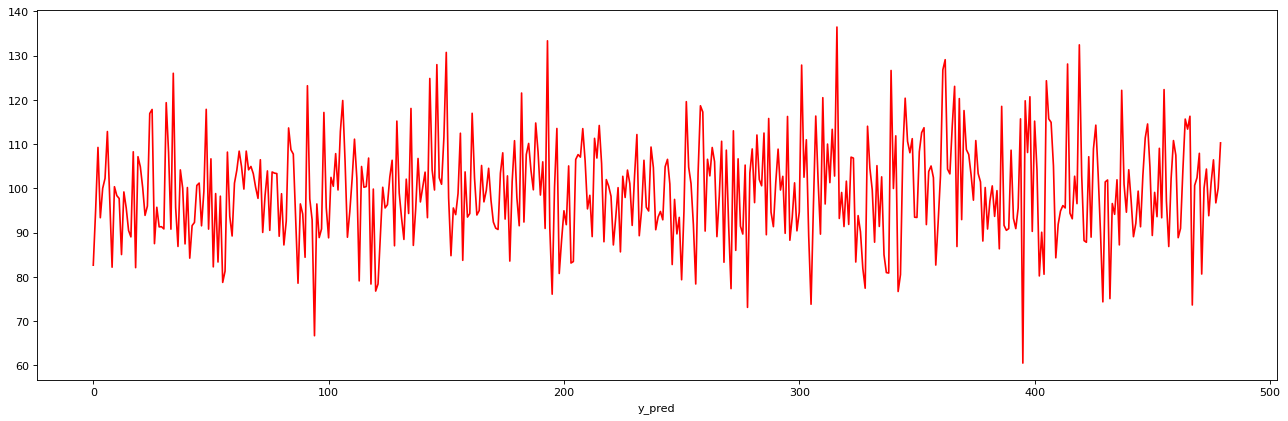

In [ ]:
figure(figsize=(20, 6), dpi=80)
plt.plot(y_pred, color="red")
plt.xlabel("y_pred")
plt.show()